<a href="https://colab.research.google.com/github/paulynamagana/AFDB_scripts/blob/main/AlphaMissense_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Clone repo <br>

###check if repot is already here
import os
import sys
import shutil

repo_name = "AFDB_scripts"

repo_path = "/content/AFDB_scripts"

# Check if the repository directory already exists


# Check if the repository directory already exists
if os.path.exists(repo_path):
    # Remove the existing repository directory
    shutil.rmtree(repo_path)
    print(f"Removed the existing repository directory: {repo_path}")

if not os.path.exists(repo_path):
    # Clone the GitHub repository
    !git clone https://github.com/paulynamagana/AFDB_scripts.git
    %cd {repo_name}

else:
    print(f"The repository '{repo_name}' has already been cloned.")
    %cd {repo_name}




Cloning into 'AFDB_scripts'...
remote: Enumerating objects: 9742, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 9742 (delta 26), reused 35 (delta 16), pack-reused 9689 (from 1)
Receiving objects: 100% (9742/9742), 59.53 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (1101/1101), done.
/content/AFDB_scripts


P05067


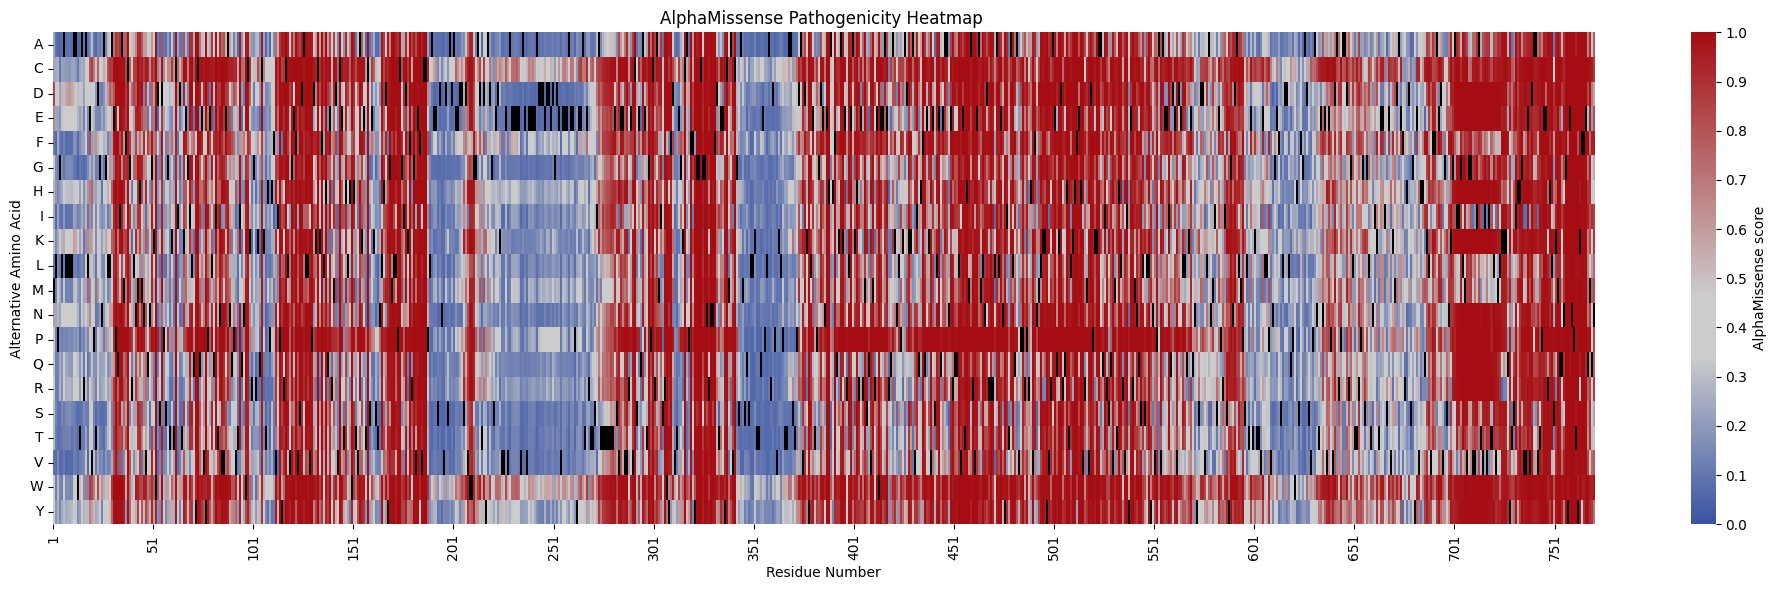

Q9Y5P2


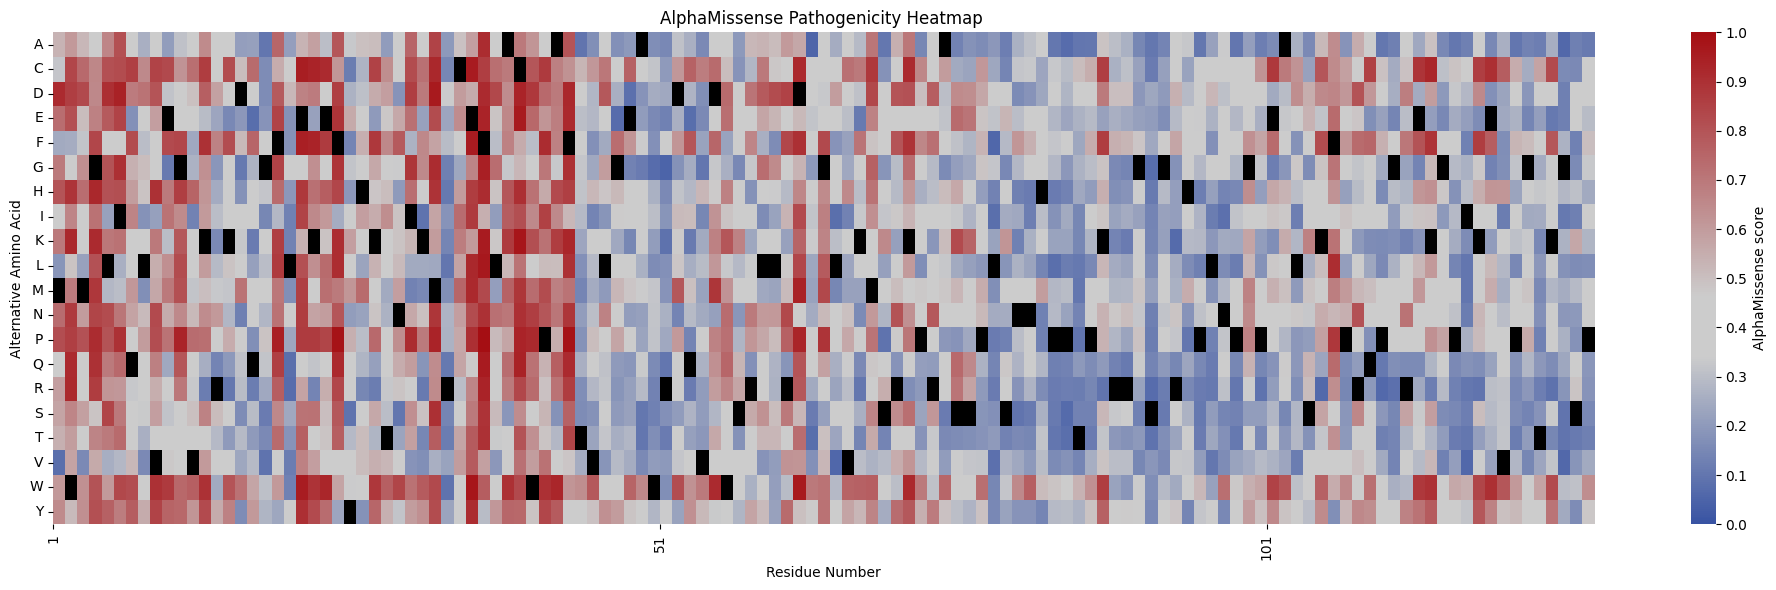

In [3]:
#@title Retrieve data from AlphaFold Database

import api_handler
import AM_data_processing

uniprot_id = "P05067, Q9Y5P2" #@param {type:"string"}

# Step 1: Split the input string by commas and strip whitespace
uniprot_ids = [accession.strip() for accession in uniprot_id.split(',')]

# Loop through each accession
for uniprot_id in uniprot_ids:

  alphafold_data = api_handler.fetch_AFDB_data(uniprot_id)
  if alphafold_data:
      am_data_url = api_handler.extract_alpha_missense_url(alphafold_data)
      pdb_data_url = api_handler.extract_pdb_url(alphafold_data)
      pae_png_url = api_handler.extract_pae_url(alphafold_data)

  am_data = AM_data_processing.extract_am_data(am_data_url)

  if am_data is not None:
      average_scores = AM_data_processing.calculate_average_pathogenicity(am_data)
      AM_data_processing.modify_pdb_with_am_data(pdb_data_url, average_scores)
      print(uniprot_id)
      AM_data_processing.plot_am_heatmap(am_data, uniprot_id)

P05067


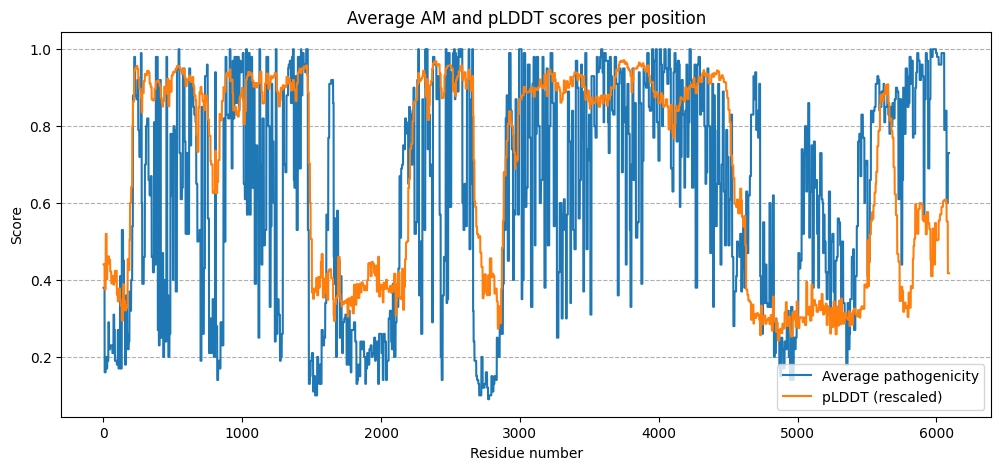

Q9Y5P2


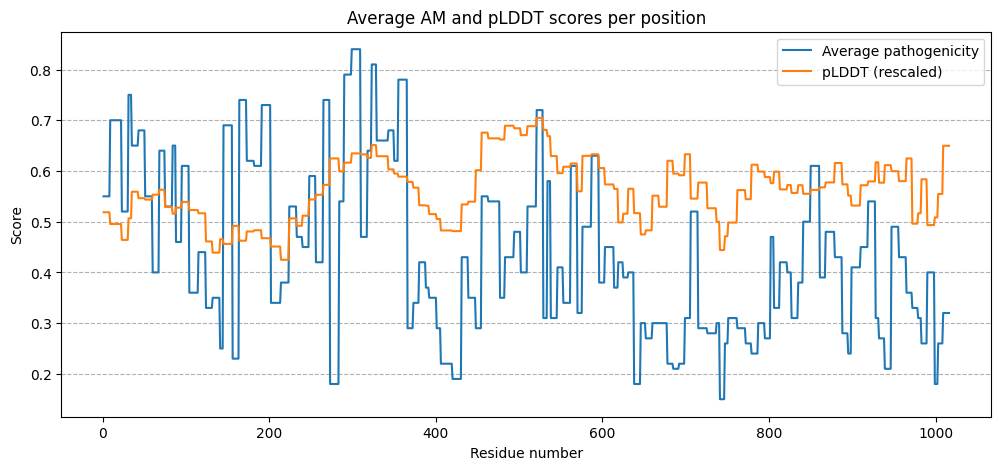

In [4]:
#@title Plot plddt and average AlphaMissense

import AM_data_processing
import plots

for uniprot_id in uniprot_ids:
  alphafold_data = api_handler.fetch_AFDB_data(uniprot_id)
  if alphafold_data:
    pdb_data_url = api_handler.extract_pdb_url(alphafold_data)
    file_path= f"data_output/AM_scores_AF-{uniprot_id}-F1-model_v4.pdb"
    pathogenicity_scores, plddt_scores = AM_data_processing.extract_pathogenicity_and_plddt(file_path, pdb_data_url)

    print(uniprot_id)
    plots.plot_scores(pathogenicity_scores, plddt_scores)

In [5]:
#@title Download all files

# Zip the extracted files
import zipfile
from pathlib import Path
from google.colab import files


folder = Path("./data_output/")
zip_filename = "AM_files.zip"

# Create a zip archive
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in folder.iterdir():  # Use iterdir() to iterate over files
        if file.is_file():  # Check if it's a file
            zipf.write(file, arcname=file.name)  # Add file to zip with only the file name
            os.remove(file)  # Remove the file after adding to zip

print(f"Created zip archive: {zip_filename}")

    # Download the zip file
files.download(zip_filename)

Created zip archive: AM_files.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>